<a href="https://www.kaggle.com/code/aminaromdhani/logistic-regression-tree-randomforest?scriptVersionId=101004339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification 

1. > Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.

![](https://cdn.educba.com/academy/wp-content/uploads/2019/12/Regression-vs-Classification.jpg)

![](https://dezyre.gumlet.io/images/blog/classification-vs-regression-in-machine-learning/Classification_vs_Regression_in_Machine_Learning_New.png?w=376&dpr=2.6)

# Data processing 

In [1]:
import pandas as pd 
import numpy as np 
import  seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd .read_csv("../input/mobile-price-classification/train.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

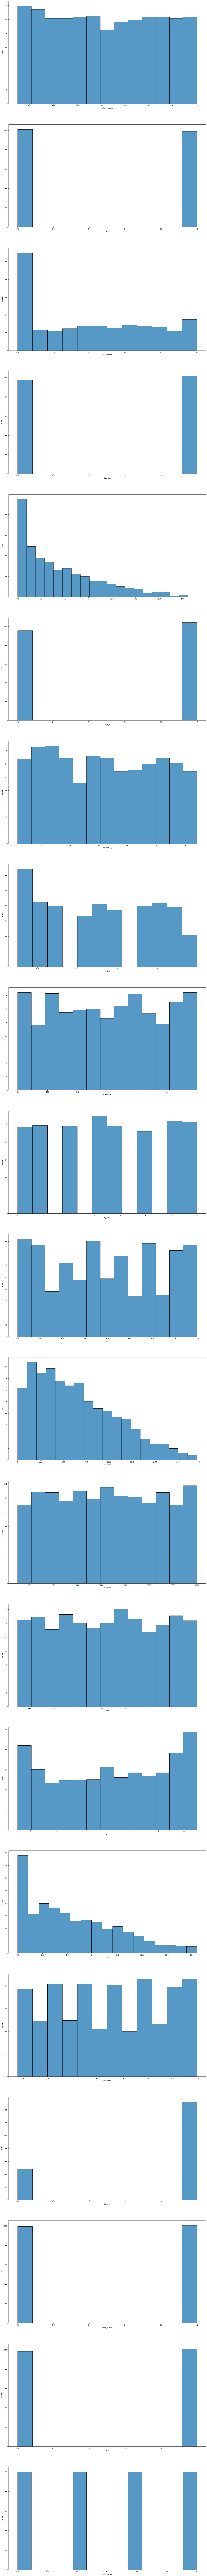

In [9]:
fig, axes = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(22,14*data.shape[1]))
for i in range(len(data.columns)):
    col = data.columns[i]
    sns.histplot(x=col, data=data, palette="pastel", ax=axes[i])
axes[0].legend([])

In [10]:
x=data.drop("price_range",axis=1)
y=data['price_range']

In [11]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [12]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


# Logistic Regression 

* > Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 


![](https://miro.medium.com/max/681/1*3FgpptTWzpd2RLgKbV-HvA.jpeg)

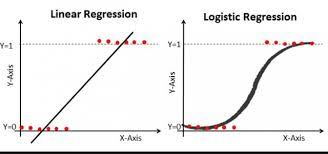

![](https://www.saedsayad.com/images/LogReg_1.png)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=100)

In [16]:
lr.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
 from sklearn.metrics import accuracy_score

In [18]:
y_pred = lr.predict(xtrain)
accuracy_score(ytrain, y_pred)

0.6383333333333333

In [19]:
y_predtest= lr.predict(xtest)
accuracy_score(ytest, y_predtest)

0.635

In [20]:
 from sklearn.metrics import accuracy_score

1. > Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes

#  Classification tree 

> 1. Classification trees (Yes/No types)
>  1. What we’ve seen above is an example of classification tree, where the outcome was a variable like ‘fit’ or ‘unfit’. Here the decision variable is Categorical.

![](https://miro.medium.com/max/945/1*XMId5sJqPtm8-RIwVVz2tg.png)

![](https://i.stack.imgur.com/yQFz6.png)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [22]:
tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
y_pred = tree.predict(xtrain)
accuracy_score(ytrain, y_pred)

1.0

In [24]:
y_predtest= tree.predict(xtest)
accuracy_score(ytest, y_predtest)

0.815

# Random Forest

1. > Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees

![](https://www.researchgate.net/publication/348965642/figure/fig2/AS:986768589463556@1612275373671/Random-Forest-Simplified-2-Extreme-Random-Forest-Then-Limit-Tree-regression-model-is.png)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=4, random_state=0)

In [27]:
y_pred_test= clf.predict(xtest)
y_pred_train= clf.predict(xtrain)

In [28]:
 from sklearn.metrics import accuracy_score

In [29]:
print("Training accuracy:\n")
print( accuracy_score(ytrain, y_pred_train))

print("\nTesting accuracy:\n")
print( accuracy_score(ytest, y_pred_test))

Training accuracy:

0.8744444444444445

Testing accuracy:

0.795
